# Importing the Libraries


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
import random

Using TensorFlow backend.


# Fetching the dataset

In [2]:
from sklearn.datasets import fetch_olivetti_faces
dataset = fetch_olivetti_faces()

# Exploring the Dataset

In [3]:
dataset

{'data': array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
         0.1570248 ],
        [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
         0.15289256],
        [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
         0.15289256],
        ...,
        [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
         0.19008264],
        [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
         0.60330576],
        [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
         0.38429752]], dtype=float32),
 'images': array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
          0.3305785 , 0.30578512],
         [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
          0.338843  , 0.3140496 ],
         [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
          0.338843  , 0.29752067],
         ...,
         [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256,
     

In [4]:
print(dir(dataset))

['DESCR', 'data', 'images', 'target']


In [5]:
print(len(dataset['images']))

400


In [6]:
print(len(dataset['target']))

400


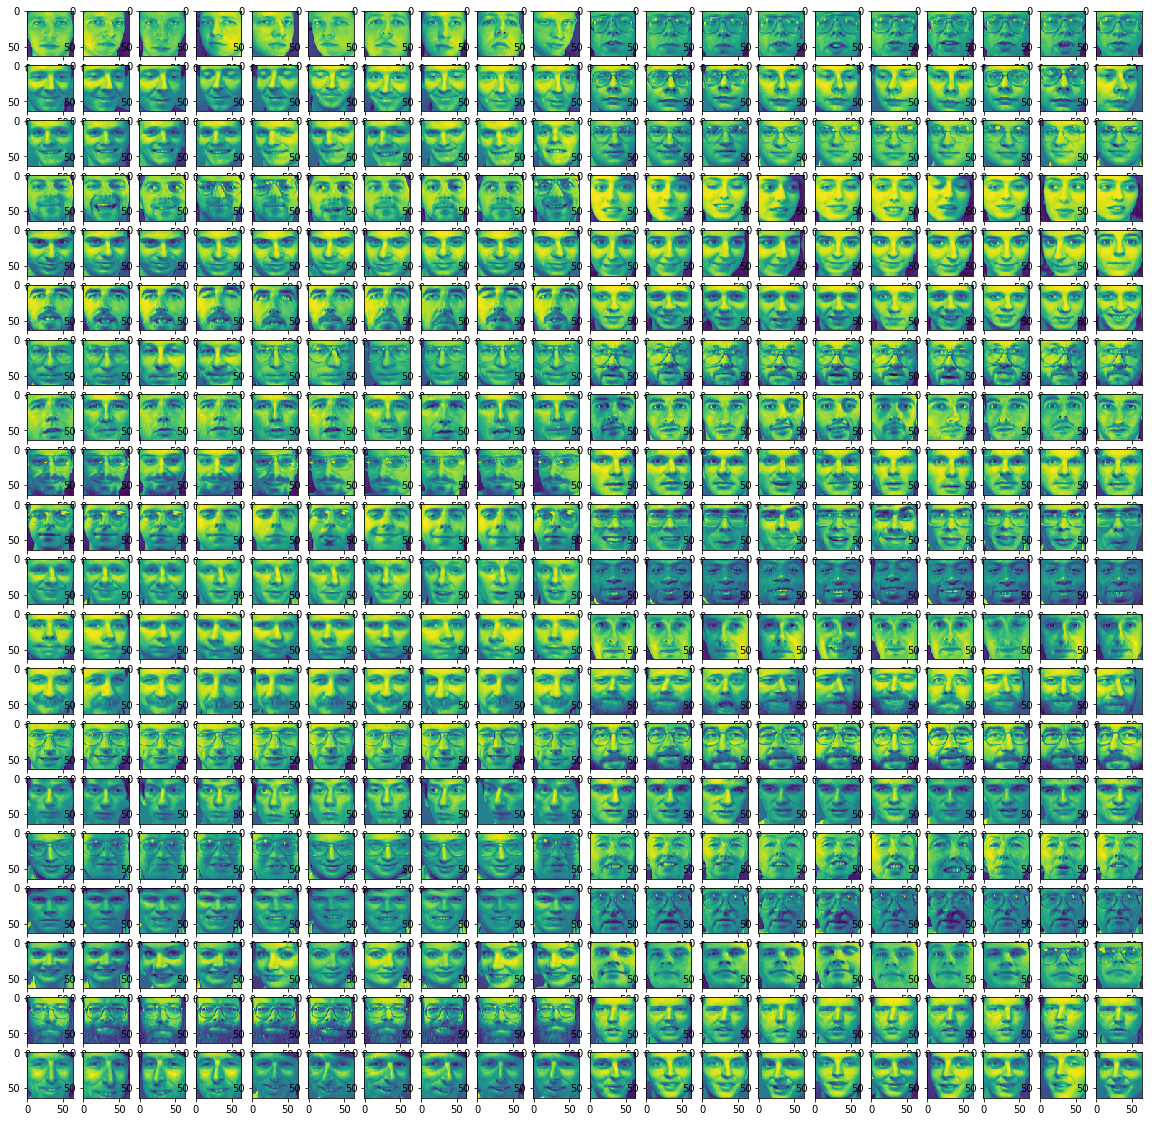

In [7]:
fig = plt.figure(figsize=(20,20))
for x in range(400):
    plt.subplot(20,20,x+1)
    plt.imshow(dataset['images'][x])
plt.show()   

# Adding  Noise to Images

In [8]:
noisy = dataset['images'] + dataset['images'].std()*3*np.random.random(64)

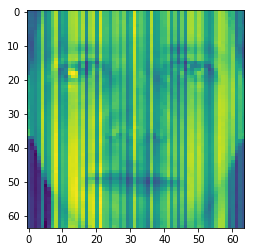

In [9]:
plt.imshow(noisy[0])

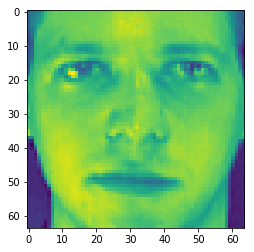

In [10]:
plt.imshow(dataset['images'][0])

# Splitting and Reshaping the Data

In [11]:
train = dataset['images'][:320]
test =  dataset['images'][320:400]
noisy_train = noisy[:320]
noisy_test = noisy[320:400]
train = train.reshape(320,64,64,1)
test = test.reshape(80,64,64,1)
noisy_train = noisy_train.reshape(320,64,64,1)
noisy_test = noisy_test.reshape(80,64,64,1)

# Setting up and Training the Model

In [12]:
input_img = Input(shape=(64, 64, 1))

nn = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
nn = MaxPooling2D((2, 2), padding='same')(nn)
nn = Conv2D(64, (3, 3), activation='relu', padding='same')(nn)
encoded = MaxPooling2D((2, 2), padding='same')(nn)


nn = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
nn = UpSampling2D((2, 2))(nn)
nn = Conv2D(64, (3, 3), activation='relu', padding='same')(nn)
nn = UpSampling2D((2, 2))(nn)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(nn)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta',loss='binary_crossentropy')
autoencoder.fit(noisy_train, train,
                epochs=1000,
                validation_data=(noisy_test, test))








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 320 samples, validate on 80 samples
Epoch 1/1000
320/320 [==============================] - 12s 38ms/step - loss: 0.6813 - val_loss: 0.6891
Epoch 2/1000
320/320 [==============================] - 11s 36ms/step - loss: 0.6803 - val_loss: 0.7077
Epoch 3/1000
320/320 [==============================] - 11s 35ms/step - loss: 0.6790 - val_loss: 0.6892
Epoch 4/1000
320/320 [==============================] - 11s 34ms/step - loss: 0.6778 - val_loss: 0.6874
Epoch 5/1000
320/320 [==============================] - 11s 33ms/step - loss: 0.6760 - val_loss: 0.6984
Epoch 6/1000
320/320 [==============================] - 10s 32ms/step - loss: 0.6748 - val_loss: 0.6829
Epoch 7/1000
320/320 [==============================] - 11s 35ms/step - loss: 0.6811 - val_loss: 0.6839
Epoch 8/1000
320/320 [==============================] - 11s 34ms/step - loss: 0.6713 - val_loss: 0.6916
Epoch 9/1000
320/320 

Epoch 62/1000
320/320 [==============================] - 11s 35ms/step - loss: 0.6391 - val_loss: 0.6426
Epoch 63/1000
320/320 [==============================] - 11s 36ms/step - loss: 0.6404 - val_loss: 0.6448
Epoch 64/1000
320/320 [==============================] - 11s 36ms/step - loss: 0.6391 - val_loss: 0.6448
Epoch 65/1000
320/320 [==============================] - 11s 36ms/step - loss: 0.6396 - val_loss: 0.6444
Epoch 66/1000
320/320 [==============================] - 11s 35ms/step - loss: 0.6400 - val_loss: 0.6461
Epoch 67/1000
320/320 [==============================] - 11s 35ms/step - loss: 0.6399 - val_loss: 0.6417
Epoch 68/1000
320/320 [==============================] - 11s 35ms/step - loss: 0.6377 - val_loss: 0.6553
Epoch 69/1000
320/320 [==============================] - 11s 35ms/step - loss: 0.6362 - val_loss: 0.6433
Epoch 70/1000
320/320 [==============================] - 11s 36ms/step - loss: 0.6382 - val_loss: 0.6436
Epoch 71/1000
320/320 [==============================] 

320/320 [==============================] - 3961s 12s/step - loss: 0.6341 - val_loss: 0.6398
Epoch 140/1000
320/320 [==============================] - 10s 31ms/step - loss: 0.6349 - val_loss: 0.6381
Epoch 141/1000
320/320 [==============================] - 7s 23ms/step - loss: 0.6303 - val_loss: 0.6417
Epoch 142/1000
320/320 [==============================] - 6s 20ms/step - loss: 0.6359 - val_loss: 0.6399
Epoch 143/1000
320/320 [==============================] - 6s 20ms/step - loss: 0.6334 - val_loss: 0.6396
Epoch 144/1000
320/320 [==============================] - 7s 21ms/step - loss: 0.6338 - val_loss: 0.6395
Epoch 145/1000
320/320 [==============================] - 7s 21ms/step - loss: 0.6331 - val_loss: 0.6404
Epoch 146/1000
320/320 [==============================] - 8s 24ms/step - loss: 0.6335 - val_loss: 0.6397
Epoch 147/1000
320/320 [==============================] - 98s 306ms/step - loss: 0.6337 - val_loss: 0.6407
Epoch 148/1000
320/320 [==============================] - 10s 30m

320/320 [==============================] - 11s 36ms/step - loss: 0.6331 - val_loss: 0.6401
Epoch 217/1000
320/320 [==============================] - 11s 36ms/step - loss: 0.6311 - val_loss: 0.6383
Epoch 218/1000
320/320 [==============================] - 12s 36ms/step - loss: 0.6325 - val_loss: 0.6382
Epoch 219/1000
320/320 [==============================] - 11s 36ms/step - loss: 0.6318 - val_loss: 0.6411
Epoch 220/1000
320/320 [==============================] - 11s 36ms/step - loss: 0.6316 - val_loss: 0.6390
Epoch 221/1000
320/320 [==============================] - 11s 36ms/step - loss: 0.6317 - val_loss: 0.6395
Epoch 222/1000
320/320 [==============================] - 11s 35ms/step - loss: 0.6301 - val_loss: 0.6397
Epoch 223/1000
320/320 [==============================] - 12s 37ms/step - loss: 0.6327 - val_loss: 0.6382
Epoch 224/1000
320/320 [==============================] - 11s 35ms/step - loss: 0.6312 - val_loss: 0.6410
Epoch 225/1000
320/320 [==============================] - 12s

320/320 [==============================] - 12s 37ms/step - loss: 0.6315 - val_loss: 0.6382
Epoch 294/1000
320/320 [==============================] - 12s 37ms/step - loss: 0.6306 - val_loss: 0.6377
Epoch 295/1000
320/320 [==============================] - 11s 36ms/step - loss: 0.6309 - val_loss: 0.6392
Epoch 296/1000
320/320 [==============================] - 12s 36ms/step - loss: 0.6309 - val_loss: 0.6379
Epoch 297/1000
320/320 [==============================] - 12s 37ms/step - loss: 0.6309 - val_loss: 0.6380
Epoch 298/1000
320/320 [==============================] - 12s 36ms/step - loss: 0.6307 - val_loss: 0.6395
Epoch 299/1000
320/320 [==============================] - 12s 37ms/step - loss: 0.6318 - val_loss: 0.6381
Epoch 300/1000
320/320 [==============================] - 12s 36ms/step - loss: 0.6306 - val_loss: 0.6377
Epoch 301/1000
320/320 [==============================] - 12s 36ms/step - loss: 0.6305 - val_loss: 0.6397
Epoch 302/1000
320/320 [==============================] - 11s

320/320 [==============================] - 11s 35ms/step - loss: 0.6303 - val_loss: 0.6377
Epoch 371/1000
320/320 [==============================] - 11s 35ms/step - loss: 0.6300 - val_loss: 0.6371
Epoch 372/1000
320/320 [==============================] - 11s 35ms/step - loss: 0.6300 - val_loss: 0.6384
Epoch 373/1000
320/320 [==============================] - 11s 35ms/step - loss: 0.6303 - val_loss: 0.6371
Epoch 374/1000
320/320 [==============================] - 11s 35ms/step - loss: 0.6309 - val_loss: 0.6370
Epoch 375/1000
320/320 [==============================] - 11s 35ms/step - loss: 0.6300 - val_loss: 0.6372
Epoch 376/1000
320/320 [==============================] - 11s 35ms/step - loss: 0.6300 - val_loss: 0.6370
Epoch 377/1000
320/320 [==============================] - 11s 35ms/step - loss: 0.6306 - val_loss: 0.6373
Epoch 378/1000
320/320 [==============================] - 11s 36ms/step - loss: 0.6309 - val_loss: 0.6378
Epoch 379/1000
320/320 [==============================] - 11s

320/320 [==============================] - 11s 36ms/step - loss: 0.6295 - val_loss: 0.6373
Epoch 448/1000
320/320 [==============================] - 11s 35ms/step - loss: 0.6298 - val_loss: 0.6375
Epoch 449/1000
320/320 [==============================] - 11s 36ms/step - loss: 0.6303 - val_loss: 0.6367
Epoch 450/1000
320/320 [==============================] - 11s 35ms/step - loss: 0.6304 - val_loss: 0.6365
Epoch 451/1000
320/320 [==============================] - 11s 36ms/step - loss: 0.6292 - val_loss: 0.6369
Epoch 452/1000
320/320 [==============================] - 11s 36ms/step - loss: 0.6295 - val_loss: 0.6364
Epoch 453/1000
320/320 [==============================] - 11s 36ms/step - loss: 0.6296 - val_loss: 0.6364
Epoch 454/1000
320/320 [==============================] - 11s 34ms/step - loss: 0.6297 - val_loss: 0.6387
Epoch 455/1000
320/320 [==============================] - 11s 36ms/step - loss: 0.6294 - val_loss: 0.6380
Epoch 456/1000
320/320 [==============================] - 11s

Epoch 525/1000
320/320 [==============================] - 7s 20ms/step - loss: 0.6294 - val_loss: 0.6363
Epoch 526/1000
320/320 [==============================] - 7s 21ms/step - loss: 0.6284 - val_loss: 0.6368
Epoch 527/1000
320/320 [==============================] - 7s 21ms/step - loss: 0.6297 - val_loss: 0.6362
Epoch 528/1000
320/320 [==============================] - 7s 21ms/step - loss: 0.6297 - val_loss: 0.6361
Epoch 529/1000
320/320 [==============================] - 7s 21ms/step - loss: 0.6294 - val_loss: 0.6356
Epoch 530/1000
320/320 [==============================] - 7s 21ms/step - loss: 0.6283 - val_loss: 0.6375
Epoch 531/1000
320/320 [==============================] - 7s 20ms/step - loss: 0.6292 - val_loss: 0.6363
Epoch 532/1000
320/320 [==============================] - 7s 22ms/step - loss: 0.6293 - val_loss: 0.6369
Epoch 533/1000
320/320 [==============================] - 7s 21ms/step - loss: 0.6296 - val_loss: 0.6364
Epoch 534/1000
320/320 [==============================]

Epoch 603/1000
320/320 [==============================] - 8s 25ms/step - loss: 0.6290 - val_loss: 0.6363
Epoch 604/1000
320/320 [==============================] - 8s 25ms/step - loss: 0.6287 - val_loss: 0.6362
Epoch 605/1000
320/320 [==============================] - 7s 22ms/step - loss: 0.6288 - val_loss: 0.6372
Epoch 606/1000
320/320 [==============================] - 7s 22ms/step - loss: 0.6286 - val_loss: 0.6359
Epoch 607/1000
320/320 [==============================] - 7s 22ms/step - loss: 0.6291 - val_loss: 0.6358
Epoch 608/1000
320/320 [==============================] - 8s 24ms/step - loss: 0.6286 - val_loss: 0.6367
Epoch 609/1000
320/320 [==============================] - 8s 24ms/step - loss: 0.6287 - val_loss: 0.6368
Epoch 610/1000
320/320 [==============================] - 7s 23ms/step - loss: 0.6290 - val_loss: 0.6356
Epoch 611/1000
320/320 [==============================] - 9s 28ms/step - loss: 0.6284 - val_loss: 0.6359
Epoch 612/1000
320/320 [==============================]

320/320 [==============================] - 7s 23ms/step - loss: 0.6289 - val_loss: 0.6354
Epoch 682/1000
320/320 [==============================] - 8s 25ms/step - loss: 0.6282 - val_loss: 0.6361
Epoch 683/1000
320/320 [==============================] - 9s 28ms/step - loss: 0.6289 - val_loss: 0.6358
Epoch 684/1000
320/320 [==============================] - 8s 24ms/step - loss: 0.6286 - val_loss: 0.6356
Epoch 685/1000
320/320 [==============================] - 8s 24ms/step - loss: 0.6283 - val_loss: 0.6355
Epoch 686/1000
320/320 [==============================] - 8s 24ms/step - loss: 0.6284 - val_loss: 0.6355
Epoch 687/1000
320/320 [==============================] - 8s 26ms/step - loss: 0.6281 - val_loss: 0.6361
Epoch 688/1000
320/320 [==============================] - 8s 26ms/step - loss: 0.6283 - val_loss: 0.6358
Epoch 689/1000
320/320 [==============================] - 8s 25ms/step - loss: 0.6284 - val_loss: 0.6357
Epoch 690/1000
320/320 [==============================] - 8s 24ms/step

320/320 [==============================] - 9s 27ms/step - loss: 0.6286 - val_loss: 0.6359
Epoch 760/1000
320/320 [==============================] - 9s 27ms/step - loss: 0.6284 - val_loss: 0.6356
Epoch 761/1000
320/320 [==============================] - 8s 26ms/step - loss: 0.6281 - val_loss: 0.6360
Epoch 762/1000
320/320 [==============================] - 8s 26ms/step - loss: 0.6285 - val_loss: 0.6354
Epoch 763/1000
320/320 [==============================] - 9s 28ms/step - loss: 0.6281 - val_loss: 0.6358
Epoch 764/1000
320/320 [==============================] - 9s 27ms/step - loss: 0.6281 - val_loss: 0.6357
Epoch 765/1000
320/320 [==============================] - 10s 30ms/step - loss: 0.6288 - val_loss: 0.6361
Epoch 766/1000
320/320 [==============================] - 9s 27ms/step - loss: 0.6281 - val_loss: 0.6357
Epoch 767/1000
320/320 [==============================] - 8s 26ms/step - loss: 0.6289 - val_loss: 0.6357
Epoch 768/1000
320/320 [==============================] - 9s 27ms/ste

320/320 [==============================] - 8s 24ms/step - loss: 0.6281 - val_loss: 0.6355
Epoch 838/1000
320/320 [==============================] - 8s 26ms/step - loss: 0.6284 - val_loss: 0.6354
Epoch 839/1000
320/320 [==============================] - 10s 30ms/step - loss: 0.6280 - val_loss: 0.6352
Epoch 840/1000
320/320 [==============================] - 8s 26ms/step - loss: 0.6281 - val_loss: 0.6356
Epoch 841/1000
320/320 [==============================] - 8s 25ms/step - loss: 0.6280 - val_loss: 0.6357
Epoch 842/1000
320/320 [==============================] - 8s 25ms/step - loss: 0.6286 - val_loss: 0.6353
Epoch 843/1000
320/320 [==============================] - 8s 24ms/step - loss: 0.6276 - val_loss: 0.6353
Epoch 844/1000
320/320 [==============================] - 8s 24ms/step - loss: 0.6284 - val_loss: 0.6359
Epoch 845/1000
320/320 [==============================] - 8s 24ms/step - loss: 0.6283 - val_loss: 0.6356
Epoch 846/1000
320/320 [==============================] - 8s 24ms/ste

320/320 [==============================] - 7s 23ms/step - loss: 0.6281 - val_loss: 0.6355
Epoch 916/1000
320/320 [==============================] - 7s 23ms/step - loss: 0.6283 - val_loss: 0.6352
Epoch 917/1000
320/320 [==============================] - 8s 24ms/step - loss: 0.6278 - val_loss: 0.6361
Epoch 918/1000
320/320 [==============================] - 8s 26ms/step - loss: 0.6275 - val_loss: 0.6350
Epoch 919/1000
320/320 [==============================] - 8s 25ms/step - loss: 0.6284 - val_loss: 0.6358
Epoch 920/1000
320/320 [==============================] - 8s 24ms/step - loss: 0.6278 - val_loss: 0.6358
Epoch 921/1000
320/320 [==============================] - 8s 24ms/step - loss: 0.6286 - val_loss: 0.6357
Epoch 922/1000
320/320 [==============================] - 8s 24ms/step - loss: 0.6282 - val_loss: 0.6359
Epoch 923/1000
320/320 [==============================] - 8s 24ms/step - loss: 0.6282 - val_loss: 0.6355
Epoch 924/1000
320/320 [==============================] - 8s 24ms/step

320/320 [==============================] - 7s 22ms/step - loss: 0.6280 - val_loss: 0.6356
Epoch 994/1000
320/320 [==============================] - 8s 24ms/step - loss: 0.6280 - val_loss: 0.6355
Epoch 995/1000
320/320 [==============================] - 8s 26ms/step - loss: 0.6280 - val_loss: 0.6353
Epoch 996/1000
320/320 [==============================] - 9s 27ms/step - loss: 0.6276 - val_loss: 0.6353
Epoch 997/1000
320/320 [==============================] - 8s 25ms/step - loss: 0.6276 - val_loss: 0.6353
Epoch 998/1000
320/320 [==============================] - 8s 25ms/step - loss: 0.6279 - val_loss: 0.6355
Epoch 999/1000
320/320 [==============================] - 8s 26ms/step - loss: 0.6282 - val_loss: 0.6362
Epoch 1000/1000
320/320 [==============================] - 9s 27ms/step - loss: 0.6280 - val_loss: 0.6353


# Predicting the Model

In [13]:
decoded_imgs = autoencoder.predict(noisy_test)

# Noisy Image

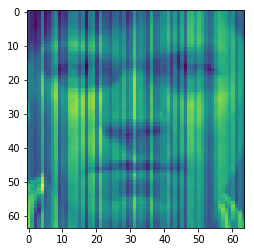

In [26]:
plt.imshow(noisy_test[0].reshape(64,64))

# Reconstructed Image

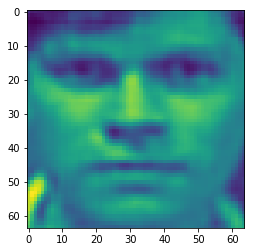

In [24]:
plt.imshow(decoded_imgs[0].reshape(64,64))

# Original Image

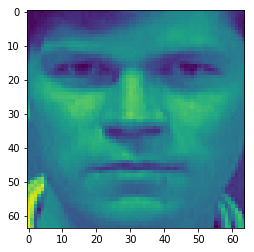

In [25]:
plt.imshow(test[0].reshape(64,64))

# Therefore, by using Convolutional Autoencoders, I was able to reconstruct the images successfully